In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# 8. haftanın konusu: Morfolojik İşlemler
# GÖrüntü İşlemenin en temel konularındandır. Siyah-beyaz görüntüler (binary image)
# ya da gri seviyedeki görüntüler üzerinde yapısal değişiklikler yapmaya yarar.

# 5 temel konusu vardır:
# 1) Erosion (erozyon)
# 2) Dilation (Genişleme)
# 3) Opening (Açılma)
# 4) Closing (Kapama)
# 5) Gradient (Gradyan)

# Erosion ve Dilation birbirinin tersi işlem yapar.
# Opening ve Closing de birbirinin tersi işlem yapar.

# Gradient ise görüntüdeki piksellerin değişim yoğunluğunu hesaplar
# Kenar belirleme konusunda en sık kullanılan klasik yöntemlerdendir.

In [9]:
# 1) Erosion (erozyon): Siyah beyaz ikili görüntüde beyaz piksellerin
# küçültülmesine-daraltılmasına yarar.
# Nasıl ki erozyonda toprak kayması, aşınması gerçekleşiyorsa
# görüntü işlemedeki erozyonda da görüntüdeki beyaz pikseller aşınır.
# Morfolojik işlemler bir matris yardımı ile gerçekleşir.
# Matris, görüntü üzerinde blok blok dolaştırılarak işlemler yapılır.

In [10]:
# 1) Erosion:

my_original_img = cv2.imread("./binary.png",0)

In [11]:
# morfolojik işlemlerin yapılması için 5x5 ve içi 1 değeriyle dolu olan
# bir matris oluşturacağız.

my_kernel = np.ones((5,5),dtype=np.uint8)
my_kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

Text(0.5, 1.0, 'EROSION Image')

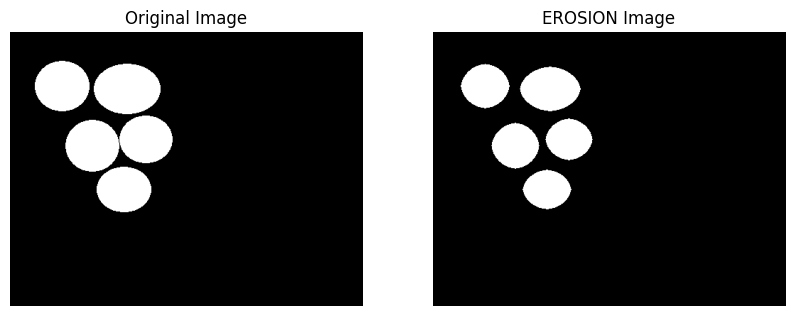

In [12]:
my_erosion_img = cv2.erode(my_original_img, my_kernel, iterations=2)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(my_original_img, cmap="gray")
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(my_erosion_img, cmap="gray")
plt.axis('off')
plt.title("EROSION Image")

Text(0.5, 1.0, 'DILATION Image')

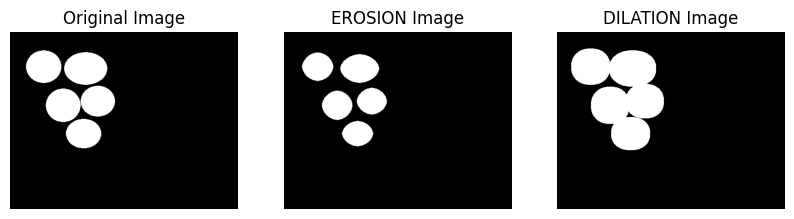

In [13]:
# Dilation (Genişleme): Erosion işleminin tam tersidir.

my_dilation_img = cv2.dilate(my_original_img, my_kernel, iterations=2)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(my_original_img, cmap="gray")
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(my_erosion_img, cmap="gray")
plt.axis('off')
plt.title("EROSION Image")

fig.add_subplot(rows, columns, 3)
plt.imshow(my_dilation_img, cmap="gray")
plt.axis('off')
plt.title("DILATION Image")

In [14]:
# OPENING (Açma) İşlemi: Görüntüye önce Erosion sonra da dilation işlemi
# uygular. Burada amaç, gürültülü görüntüdeki gürültülerin giderilmesidir.
# Gürültü, bir görüntüde istenmeyen piksellerdir.

new_img = cv2.imread("./binary_with_text.png",0)

# gürültü tanımlama

white_noise = np.random.randint(0,2,size=new_img.shape[:2])
white_noise = white_noise * 255

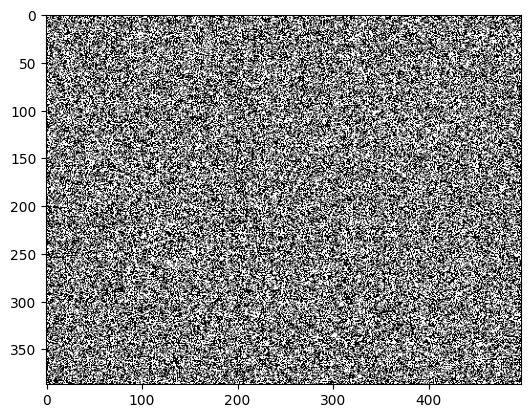

In [15]:
plt.imshow(white_noise,cmap="gray")

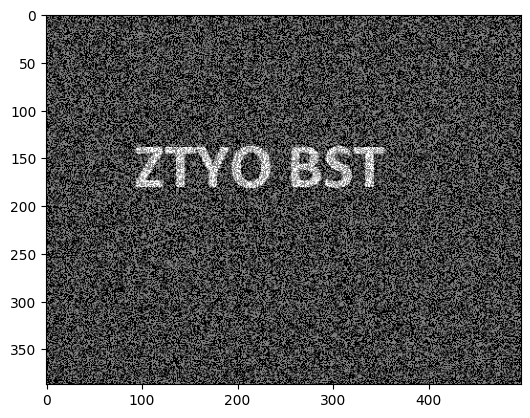

In [16]:
my_noised_img = new_img + white_noise
plt.imshow(my_noised_img,cmap="gray")

In [17]:
my_opening_img = cv2.morphologyEx(my_noised_img.astype(np.float32),
                                 cv2.MORPH_OPEN, my_kernel)

Text(0.5, 1.0, 'OPENING Image')

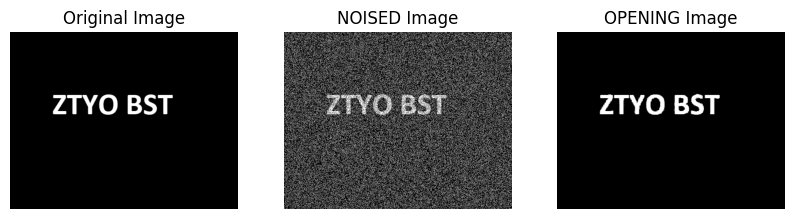

In [18]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(new_img, cmap="gray")
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(my_noised_img, cmap="gray")
plt.axis('off')
plt.title("NOISED Image")

fig.add_subplot(rows, columns, 3)
plt.imshow(my_opening_img, cmap="gray")
plt.axis('off')
plt.title("OPENING Image")

In [19]:
black_noise = np.random.randint(0,2,size=new_img.shape[:2])
black_noise = black_noise * -255
my_black_noised_img = new_img + black_noise

In [20]:
print(np.max(black_noise))
print(np.min(black_noise))

0
-255


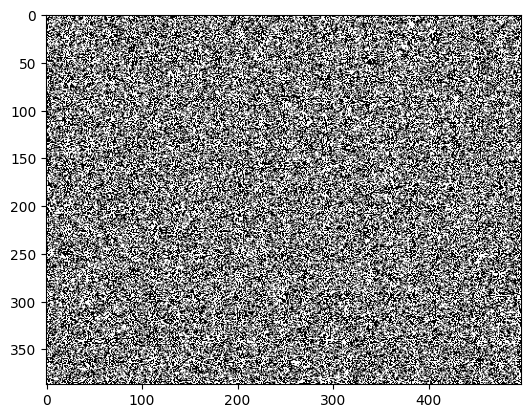

In [21]:
plt.imshow(black_noise,cmap="gray")

In [22]:
my_black_noised_img = new_img + black_noise

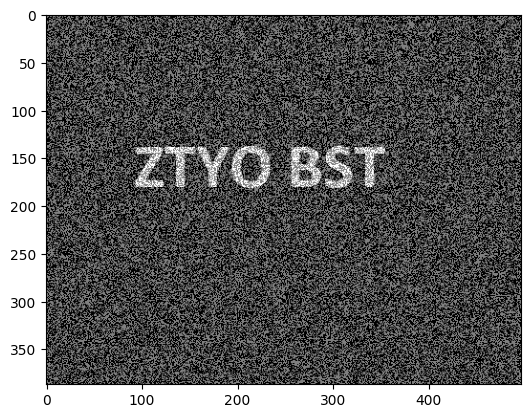

In [23]:
plt.imshow(my_black_noised_img,cmap="gray")

In [24]:
my_black_noised_img[my_black_noised_img <= -245] = 0

In [25]:
my_closing_img = cv2.morphologyEx(my_black_noised_img.astype(np.float32),
                                 cv2.MORPH_CLOSE, my_kernel)

Text(0.5, 1.0, 'CLOSING Image')

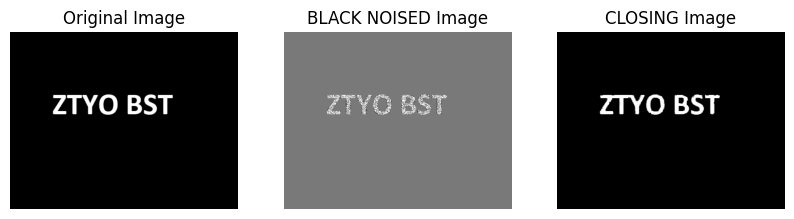

In [26]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(new_img, cmap="gray")
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(my_black_noised_img, cmap="gray")
plt.axis('off')
plt.title("BLACK NOISED Image")

fig.add_subplot(rows, columns, 3)
plt.imshow(my_closing_img, cmap="gray")
plt.axis('off')
plt.title("CLOSING Image")

In [27]:
my_gradient_img_1 = cv2.morphologyEx(my_original_img, cv2.MORPH_GRADIENT,
                                    my_kernel)

my_gradient_img_2 = cv2.morphologyEx(new_img, cv2.MORPH_GRADIENT,
                                    my_kernel)

Text(0.5, 1.0, 'GRADIENT Image 2')

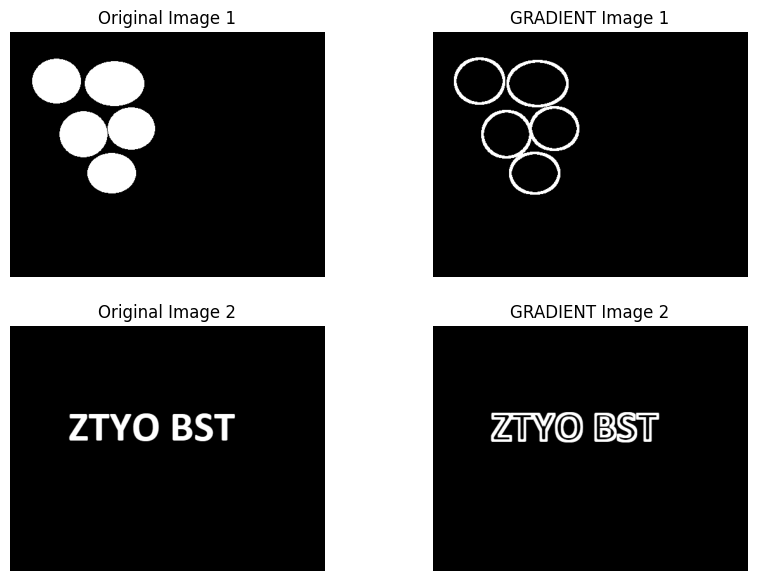

In [28]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(my_original_img, cmap="gray")
plt.axis('off')
plt.title("Original Image 1")

fig.add_subplot(rows, columns, 2)
plt.imshow(my_gradient_img_1, cmap="gray")
plt.axis('off')
plt.title("GRADIENT Image 1")

fig.add_subplot(rows, columns, 3)
plt.imshow(new_img, cmap="gray")
plt.axis('off')
plt.title("Original Image 2")

fig.add_subplot(rows, columns, 4)
plt.imshow(my_gradient_img_2, cmap="gray")
plt.axis('off')
plt.title("GRADIENT Image 2")